In [1]:
import pandas as pd
import numpy as np

# Se analizará una Base de Datos de Kaggle, sobre información del Titanic

In [2]:
df = pd.read_csv(r"C:\Users\GUSTAVO\Desktop\GustavoALL\Cursos\01_ Bases de datos para Practicar\Titanic\train.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 11)

In [4]:
df1 = df[["Survived", "Pclass", "Sex", "Age"]]
df1.head()

,Survived,Pclass,Sex,Age
PassengerId,,,,
1,0,3,male,22.0
2,1,1,female,38.0
3,1,3,female,26.0
4,1,1,female,35.0
5,0,3,male,35.0


In [5]:
# AQUI CONVERTIMOS NUESTRA VARIABLE SEX, A BINARIA, EN EL CUAL MUJER=1 Y HOMBRE=0

df1["Sexo"] = 0
df1.loc[df1.Sex=="female",'Sexo']=1
#df1.loc[df1.Sex=="male",'Sexo']=0


df1.head()

C:\Users\GUSTAVO\AppData\Local\Temp\ipykernel_10108\2928512664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Sexo"] = 0


,Survived,Pclass,Sex,Age,Sexo
PassengerId,,,,,
1,0,3,male,22.0,0
2,1,1,female,38.0,1
3,1,3,female,26.0,1
4,1,1,female,35.0,1
5,0,3,male,35.0,0


### Obtenemos las variables a analizar en nuestro DataFrame

In [6]:
df2 = df1[[ "Survived", "Pclass", "Sexo", "Age"]]
df2.describe()

,Survived,Pclass,Sexo,Age
count,891.000000,891.000000,891.000000,714.000000
mean,0.383838,2.308642,0.352413,29.699118
std,0.486592,0.836071,0.477990,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,20.125000
50%,0.000000,3.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


In [7]:
df2.isnull().sum()

Survived      0
Pclass        0
Sexo          0
Age         177
dtype: int64

Vemos que nuestra variable Age= edad, tiene 177 valores NaN

In [8]:
df2["Age"].fillna(df2["Age"].mean(), inplace=True)

C:\Users\GUSTAVO\AppData\Local\Temp\ipykernel_10108\3743866213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Age"].fillna(df2["Age"].mean(), inplace=True)


In [9]:
df2.describe()

,Survived,Pclass,Sexo,Age
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118
std,0.486592,0.836071,0.477990,13.002015
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,22.000000
50%,0.000000,3.000000,0.000000,29.699118
75%,1.000000,3.000000,1.000000,35.000000
max,1.000000,3.000000,1.000000,80.000000


Una de las medidas que se está tomando para no eliminar directamente la información de las filas con valores NaN, es llenarlas con el promedio de la edad.

**Considerar lo siguiente:**  
1: pclass : un indicador del nivel socioeconómico (SES)
        1 = superior,
        2 = medio y
        3 = inferior  
2: Survived, Si=1 y No=0  
3: Sexo, Mujer=1 y Hombre=0

0    577
1    314
Name: Sexo, dtype: int64
----------------------------------------------------------------------------------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

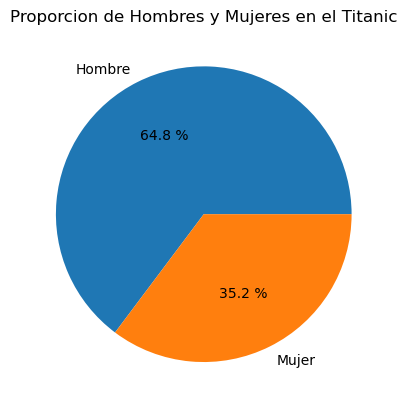

In [10]:
import matplotlib.pyplot as plt
hombre_mujer = df2["Sexo"].value_counts()
print(hombre_mujer)
print("--"*50)
nombres=["Hombre", "Mujer"]
plt.pie(hombre_mujer, labels=nombres, autopct="%0.1f %%")
plt.title('Proporcion de Hombres y Mujeres en el Titanic')
plt.show

In [11]:
df2.groupby(["Sexo"]).mean()["Age"]

Sexo
0    30.505824
1    28.216730
Name: Age, dtype: float64

Como se observa, en promedio la edad de las mujeres es inferior al de los hombres, con casi 2 años.

In [12]:
df2.groupby(["Sexo","Survived"]).mean()["Age"]

Sexo  Survived
0     0           31.175224
      1           27.631705
1     0           26.023272
      1           28.979263
Name: Age, dtype: float64

Vemos Primeramente que las mujeres que se han salvado del naufragio, en promedio tienen menor edad que las mujeres que no se han salvado y tambien menos edad que los hombres que si sobrevivieron.  
Por otro lado, los hombre que han sobrevivido al naufragio, tienen mayor edad en promedio que los hombres que no han sobrevivido pero menor edad en promedio que las mujeres que han fallecido.

In [13]:
df2.groupby(["Sexo","Survived"]).count()["Age"]

Sexo  Survived
0     0           468
      1           109
1     0            81
      1           233
Name: Age, dtype: int64

Como se sabe, en el Titanic, habia la politica de que las mujeres y niños tenian prioridad para ser salvados, y esto se ve reflejado en los datos, en el cual se observa que existe una mayor cantidad de hombres que no sobrevivieron al naufragio en cambio para las mujeres hay mayor cantidad de sobrevivientes.

<function matplotlib.pyplot.show(close=None, block=None)>

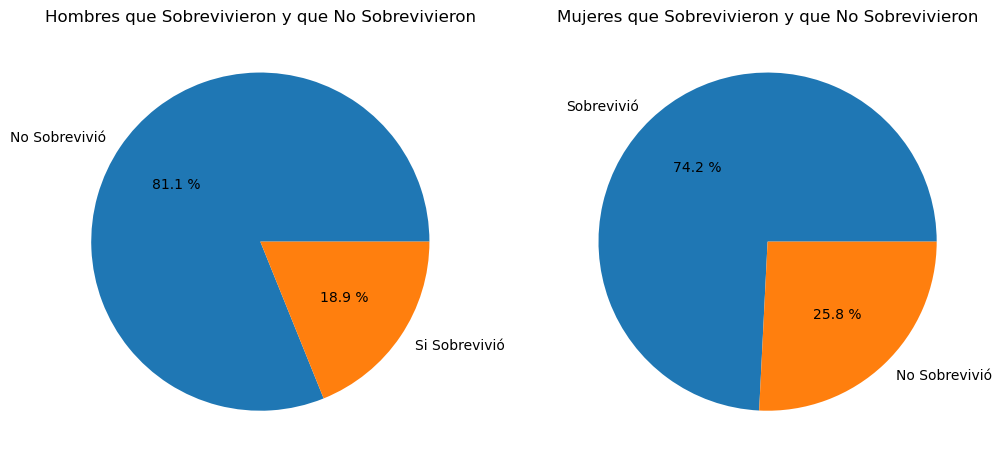

In [14]:
#Analisis de Diferencia entre hombres y mujeres
hombres = df2["Survived"].where(df2["Sexo"]==0).value_counts()
mujeres = df2["Survived"].where(df2["Sexo"]==1).value_counts()

nombres1 =["No Sobrevivió", "Si Sobrevivió"]
nombres2 = ["Sobrevivió", "No Sobrevivió"]
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.pie(hombres, labels=nombres1, autopct="%0.1f %%")
plt.title('Hombres que Sobrevivieron y que No Sobrevivieron')
plt.subplot(122)
plt.pie(mujeres, labels=nombres2, autopct="%0.1f %%")
plt.title('Mujeres que Sobrevivieron y que No Sobrevivieron')
plt.show

In [15]:
df2.groupby(["Pclass","Survived"]).count()["Age"]

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Age, dtype: int64

Podemos destacar algunas cosas:
Primero que la clase alta o superior que es igual a 1, tenemos a 136 sobrevivientes y 80 no sobrevivientes.  
Segundo que la clase baja o inferior, que es igual a 3, existe 119 sobrevivientes pero 372 no sobrevivientes.  
Por ultimo, la clase media, igual a 2, existe 87 sobrevivientes y 97 no sobrevivientes que esta mas proporcionado.

<function matplotlib.pyplot.show(close=None, block=None)>

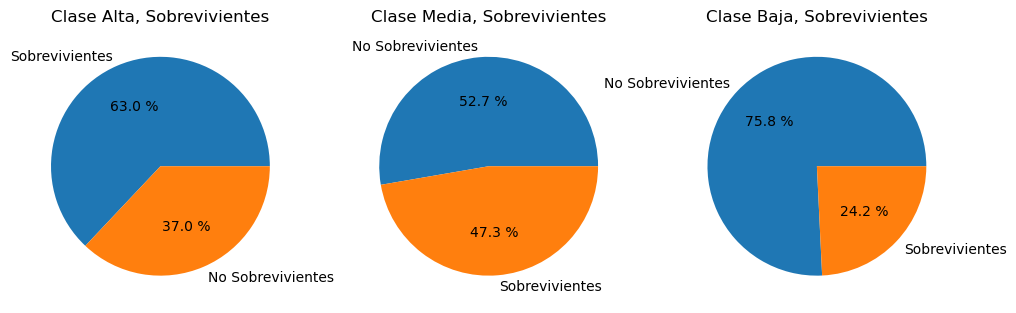

In [16]:
#Analisis de las Clases
clase1 = df2["Survived"].where(df2["Pclass"]==1).value_counts()
clase2 = df2["Survived"].where(df2["Pclass"]==2).value_counts()
clase3 = df2["Survived"].where(df2["Pclass"]==3).value_counts()

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.pie(clase1, labels=["Sobrevivientes", "No Sobrevivientes"], autopct="%0.1f %%")
plt.title('Clase Alta, Sobrevivientes')
plt.subplot(132)
plt.pie(clase2, labels=["No Sobrevivientes", "Sobrevivientes"], autopct="%0.1f %%")
plt.title('Clase Media, Sobrevivientes')
plt.subplot(133)
plt.pie(clase3, labels=["No Sobrevivientes", "Sobrevivientes"], autopct="%0.1f %%")
plt.title('Clase Baja, Sobrevivientes')
plt.show

Graficamente, podemos observar mejor las proporciones de los sobrevivientes segun la clase a la que pertenecian, y podemos determinar descriptivamente, que la clase alta fueron los que más sobrevivieron.

Los datos de los niños que sobrevivieron y que no, son los siguientes: 
1.0    40
0.0    29
Name: Survived, dtype: int64
Y los que no son niños sus datos son: 
0.0    520
1.0    302
Name: Survived, dtype: int64
----------------------------------------------------------------------------------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

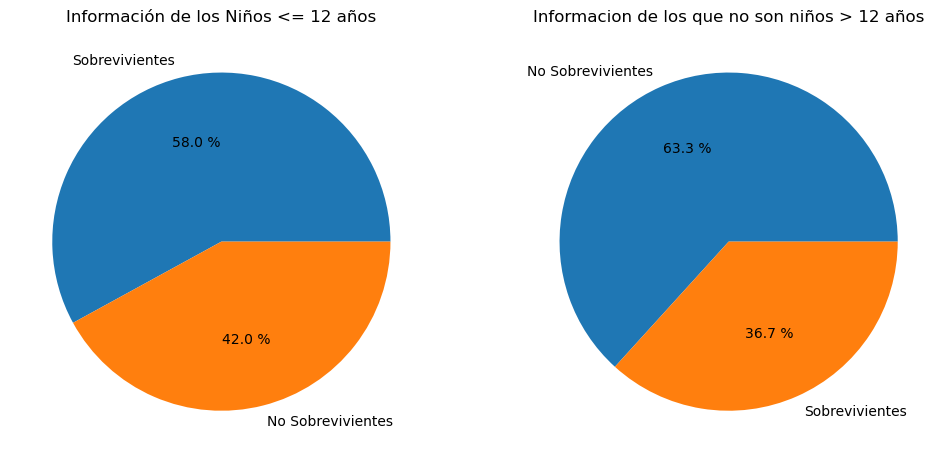

In [17]:
#Analisis de los niños con los que no eran niños.
niños = df2["Survived"].where(df2["Age"]<=12).value_counts()
no_niños = df2["Survived"].where(df2["Age"]>12).value_counts()
print(f"Los datos de los niños que sobrevivieron y que no, son los siguientes: \n{niños}\nY los que no son niños sus datos son: \n{no_niños}")
print("-"*100)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.pie(niños, labels=["Sobrevivientes", "No Sobrevivientes"], autopct="%0.1f %%")
plt.title('Información de los Niños <= 12 años')
plt.subplot(122)
plt.pie(no_niños, labels=["No Sobrevivientes", "Sobrevivientes"], autopct="%0.1f %%")
plt.title('Informacion de los que no son niños > 12 años')
plt.show

Tambien como se esperaba, existe una mayor proporción de sobrevivientes niños(as) que los que son mayores a estos, dado por las politica que se manejó en el Titanic.

## Realizando el Modelo Predictivo.

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sexo'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

<Figure size 1200x600 with 0 Axes>

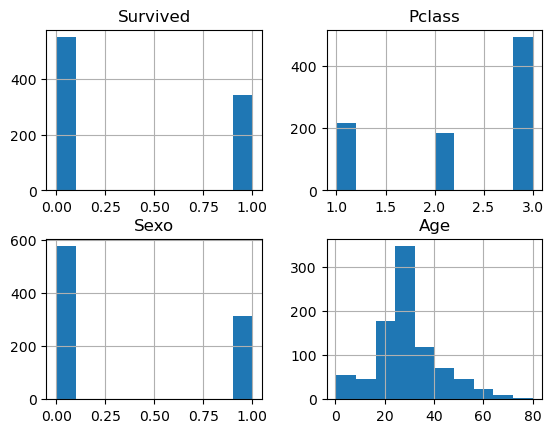

In [18]:
#Grafico de Histograma
plt.figure(figsize=(12,6))
df2.hist()

In [19]:
# Correlacion de las variables
df2.corr()

,Survived,Pclass,Sexo,Age
Survived,1.000000,-0.338481,0.543351,-0.069809
Pclass,-0.338481,1.000000,-0.131900,-0.331339
Sexo,0.543351,-0.131900,1.000000,-0.084153
Age,-0.069809,-0.331339,-0.084153,1.000000


In [20]:
#Modelado
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

caracteristicas = ["Pclass", "Sexo", "Age"]
x_train = df2[caracteristicas]
y_train = df2["Survived"]

print(f"Tamaño de Y:{y_train.shape}\nTamaño de X: {x_train.shape}")

Tamaño de Y:(891,)
Tamaño de X: (891, 3)


In [21]:
# Modelo logistico
logit = LogisticRegression()
logit.fit(x_train,y_train)

print(f"Intercepto: {logit.intercept_}")
print(f"Coeficientes: {logit.coef_}")

Intercepto: [2.07338598]
Coeficientes: [[-1.13811533  2.51919174 -0.03284127]]


In [22]:
# Modelo Arbol de Decision
a_decision = DecisionTreeClassifier()
a_decision.fit(x_train,y_train)

print(f"Profundidad del árbol: {a_decision.get_depth()}")
print(f"Número de nodos terminales: {a_decision.get_n_leaves()}")

Profundidad del árbol: 17
Número de nodos terminales: 141


In [23]:
# Evaluando los modelos
from sklearn.metrics import plot_confusion_matrix

def m_confusion(modelo):
    disp = plot_confusion_matrix(modelo, x_train, y_train,
                                cmap = plt.cm.Blues, values_format = "d")
    true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred/total_data
    print("Accuracy: ", np.round(accuracy, 2))
    plt.show()

Accuracy:  0.8


C:\Users\GUSTAVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


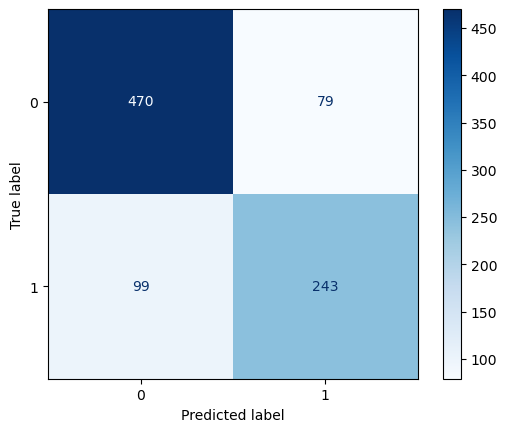

In [24]:
m_confusion(logit)

Observamos que nuestro modelo logit tiene una precisión del 80%.

Accuracy:  0.88


C:\Users\GUSTAVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


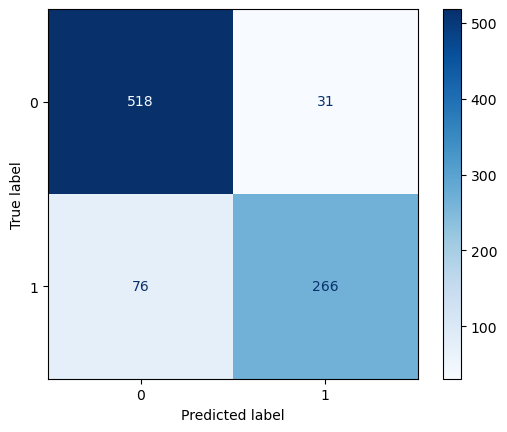

In [25]:
m_confusion(a_decision)

Observamos que nuestro modelo de Arbol de Decisión tiene una precision del 88%.

**Se envio las predicciones a Kaggle para ver la precisión de los modelos**

Una ves enviado las predicciones a Kaggle, los resultados son los siguientes:  
--El modelo logit, tiene una precisión del 0.75837  
--El modelo de Árbol de Decisión, tiene una precisión del 0.72727

**MUCHAS GRACIAS**